<a href="https://colab.research.google.com/github/iamZaid-Alam/knn-in-action/blob/main/knn_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

In [4]:
from sklearn.datasets import load_iris

df = load_iris(as_frame=True)['frame']
print("Shape is : ",df.shape)
df

Shape is :  (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
#we will use iris dataset only but from different source
# 0 -> setosa
# 1 -> versicolor
# 2 -> virginica

df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
df_setosa = df[df['Species'] == 'Iris-setosa']
df_versicolor = df[df['Species'] == 'Iris-versicolor']
df_virginica = df[df['Species'] == 'Iris-virginica']

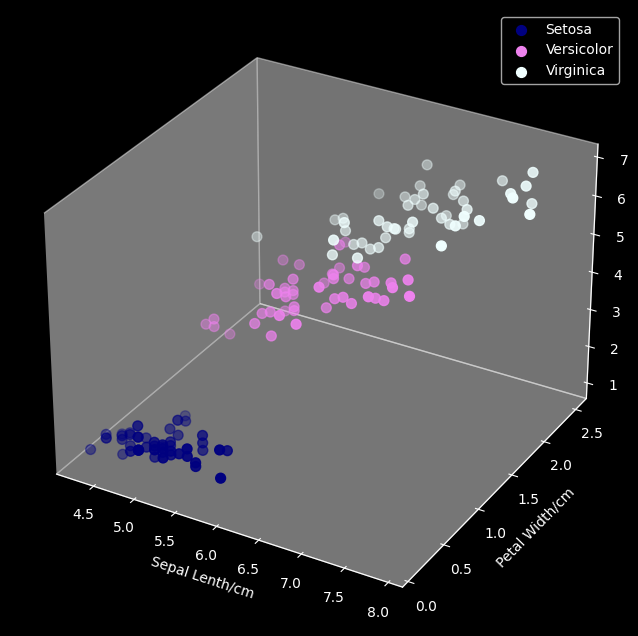

In [22]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel("Sepal Lenth/cm")
ax.set_ylabel("Petal Width/cm")
ax.set_zlabel("Petal Lenth/cm")
ax.grid(False)

x, x1, x2 = df_setosa['SepalLengthCm'], df_versicolor['SepalLengthCm'], df_virginica['SepalLengthCm']
y, y1, y2 = df_setosa['PetalWidthCm'], df_versicolor['PetalWidthCm'], df_virginica['PetalWidthCm']
z, z1, z2 = df_setosa['PetalLengthCm'], df_versicolor['PetalLengthCm'], df_virginica['PetalLengthCm']

ax.scatter3D(x,y,z,s=50, label='Setosa',c = 'navy')
ax.scatter3D(x1,y1,z1,s=50, label='Versicolor', c='violet')
ax.scatter3D(x2,y2,z2,s=50, label='Virginica', c='azure')
plt.legend()
plt.show()

In [28]:
"""
Need to prepare the data for our KNN algorithm.
x = Sepal Length, y = Petal Length, z = Petal Width.
We want a list of known inputs as [x, y, z] and the known outputs as numbers.
At present the outputs are Iris-setosa, Iris-versicolor and Iris-virginica.
We want to change this to 1, 2 and 3 respectively.
"""

known_inputs = []
known_outputs = []
species_to_number = {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica':3}

for index, row in df.iterrows():
    known_inputs.append([row['SepalLengthCm'], row['PetalLengthCm'], row['PetalWidthCm']])
    known_outputs.append(species_to_number[row['Species']])

print(known_inputs[0:5])
print(known_outputs[0:5])

[[5.1, 1.4, 0.2], [4.9, 1.4, 0.2], [4.7, 1.3, 0.2], [4.6, 1.5, 0.2], [5.0, 1.4, 0.2]]
[1, 1, 1, 1, 1]


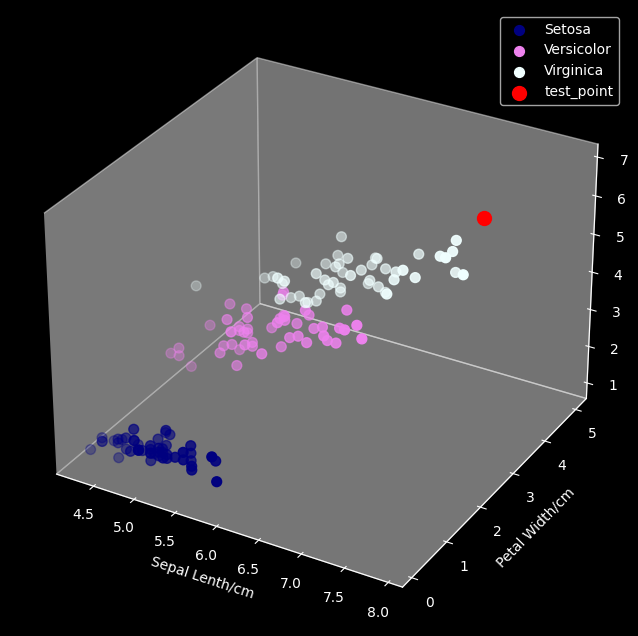

In [30]:
sepal_length = 7.0
petal_length = 5.0
petal_width = 5.0

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')
ax.set_xlabel("Sepal Lenth/cm")
ax.set_ylabel("Petal Width/cm")
ax.set_zlabel("Petal Lenth/cm")
ax.grid(False)

x, x1, x2 = df_setosa['SepalLengthCm'], df_versicolor['SepalLengthCm'], df_virginica['SepalLengthCm']
y, y1, y2 = df_setosa['PetalWidthCm'], df_versicolor['PetalWidthCm'], df_virginica['PetalWidthCm']
z, z1, z2 = df_setosa['PetalLengthCm'], df_versicolor['PetalLengthCm'], df_virginica['PetalLengthCm']
x3, y3, z3 = sepal_length, petal_length, petal_width

ax.scatter3D(x,y,z,s=50, label='Setosa',c = 'navy')
ax.scatter3D(x1,y1,z1,s=50, label='Versicolor', c='violet')
ax.scatter3D(x2,y2,z2,s=50, label='Virginica', c='azure')
ax.scatter3D(x3,y3,z3,s=100, label='test_point', c='red') #Test Point
plt.legend()
plt.show()

In [31]:
import statistics

# Modules required for kNN algorithm.

# Points as [x, y, z, ...]
def euclidean_distance(point_1, point_2):
    if len(point_1) != len(point_2):
        print("Arrays are not compatible shapes.")
        return None

    s = 0.0
    for i in range(len(point_1)):
        s += ((point_1[i] - point_2[i]) ** 2)
    return s ** 0.5


def KNN(query, known_inputs, known_outputs, k_number, show_neighbours = False):
    # 1. Measure distances.
    distances = [euclidean_distance(query, p) for p in known_inputs]

    # 2. Select k number of shortest distances.
    shortest = [0 for i in range(k_number)]
    placeholder = max(distances)
    for i in range(k_number):
        min_index = distances.index(min(distances))
        # 3. Find the output associated with the short distance.
        shortest[i] = known_outputs[min_index]
        distances[min_index] = placeholder

    if show_neighbours:
        print(shortest)

    # 4. Use mode to predict the unknown output.
    output = statistics.mode(shortest)
    return output

In [32]:
test = [x3, y3, z3]

prediction = KNN(test, known_inputs, known_outputs, 5, True)
prediction

[3, 3, 3, 3, 3]


3

In [34]:
setosa_x, setosa_y, setosa_z = [], [], []
versicolor_x, versicolor_y, versicolor_z = [], [], []
virginica_x, virginica_y, virginica_z = [], [], []

xs = [4.0 + (0.2 * x) for x in range(0, 21)]
ys = [1.0 + (0.2 * y) for y in range(0, 31)]
zs = [0.0 + (0.1 * z) for z in range(0, 26)]

for x in xs:
    for y in ys:
        for z in zs:
            prediction = KNN([x, y, z], known_inputs, known_outputs, 5)
            if prediction == 1:
                setosa_x.append(x)
                setosa_y.append(y)
                setosa_z.append(z)
            elif prediction == 2:
                versicolor_x.append(x)
                versicolor_y.append(y)
                versicolor_z.append(z)
            elif prediction == 3:
                virginica_x.append(x)
                virginica_y.append(y)
                virginica_z.append(z)

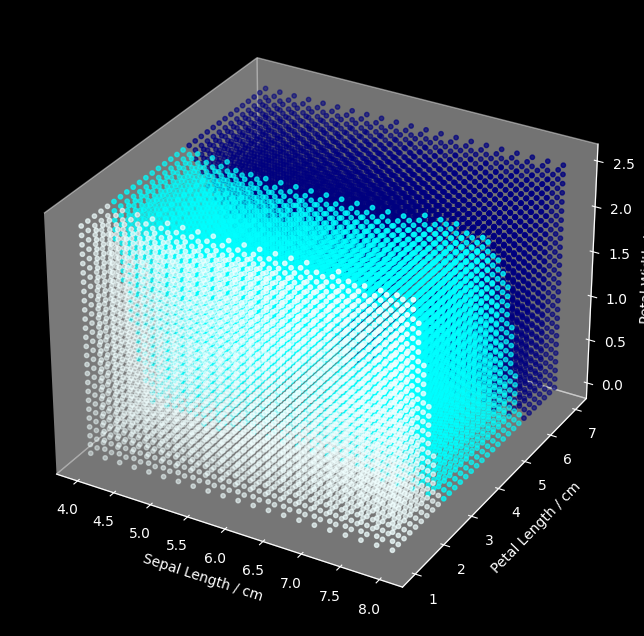

In [36]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection = '3d')
ax.set_xlabel("Sepal Length / cm")
ax.set_ylabel("Petal Length / cm")
ax.set_zlabel("Petal Width / cm")
ax.grid(False)

ax.scatter3D(setosa_x, setosa_y, setosa_z, s=10, color='azure') # Setosa
ax.scatter3D(versicolor_x, versicolor_y, versicolor_z, s=10, color='cyan') # Versicolor
ax.scatter3D(virginica_x, virginica_y, virginica_z, s=10, color='navy') # Virginica
plt.show()

In [37]:
known_inputs_4D = []

for index, row in df.iterrows():
    known_inputs_4D.append([row['SepalLengthCm'], row['SepalWidthCm'], row['PetalLengthCm'], row['PetalWidthCm']])

print(known_inputs_4D[0:5])


[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2], [4.6, 3.1, 1.5, 0.2], [5.0, 3.6, 1.4, 0.2]]


In [42]:
import random

# Accuracy Function - take a test set and perform prediction, comparing to a known output and will return a percentage accuracy.
def accuracy(test_inputs, test_outputs, train_inputs, train_outputs, k_value):
    count = 0
    for index, test in enumerate(test_inputs):
        if KNN(test, train_inputs, train_outputs, k_value) == test_outputs[index]:
            count += 1
    return (count / len(test_inputs)) * 100

# A function to create the test and train sets.
def test_train(full_inputs, full_outputs, percent_test):
    test_inputs, test_outputs, train_inputs, train_outputs = [], [], [], []

    number_test = int((len(full_inputs) / 100) * percent_test)
    random_indices = random.sample(range(0, len(full_inputs)), number_test)
    for index, item in enumerate(full_inputs):
        if index in random_indices:
            test_inputs.append(item)
            test_outputs.append(full_outputs[index])
        else:
            train_inputs.append(item)
            train_outputs.append(full_outputs[index])
    return test_inputs, test_outputs, train_inputs, train_outputs

In [43]:
# Get the test and train sets.
test_inputs, test_outputs, train_inputs, train_outputs = test_train(known_inputs_4D, known_outputs, 30)
print(test_inputs[0:5])
print(test_outputs[0:5])
print(train_inputs[0:5])
print(train_outputs[0:5])

[[4.7, 3.2, 1.3, 0.2], [5.0, 3.6, 1.4, 0.2], [4.6, 3.4, 1.4, 0.3], [5.4, 3.7, 1.5, 0.2], [4.3, 3.0, 1.1, 0.1]]
[1, 1, 1, 1, 1]
[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [4.6, 3.1, 1.5, 0.2], [5.4, 3.9, 1.7, 0.4], [5.0, 3.4, 1.5, 0.2]]
[1, 1, 1, 1, 1]


In [44]:
# Test accuracy of the kNN algorithm.
acc = accuracy(test_inputs, test_outputs, train_inputs, train_outputs, 5)
acc

97.77777777777777

In [45]:
# Can we optimise to find the best k-value?
k_list = []
accuracy_list = []
index_list = []

count = 0
for i in range(0, 30):
    test_inputs, test_outputs, train_inputs, train_outputs = test_train(known_inputs_4D, known_outputs, 30)
    for k in range(1, 16):
        acc = accuracy(test_inputs, test_outputs, train_inputs, train_outputs, k)
        k_list.append(k)
        accuracy_list.append(acc)
        index_list.append(count)
        count += 1

k_values = pd.Series(data=k_list, index=index_list)
accuracy_raw = pd.Series(data=accuracy_list, index=index_list)
ka_dict = {"k-value":k_values, "accuracy":accuracy_raw}
ka = pd.DataFrame(ka_dict)

In [46]:
ka.head()

,k-value,accuracy
0,1,91.111111
1,2,91.111111
2,3,93.333333
3,4,93.333333
4,5,93.333333


<Axes: xlabel='k-value', ylabel='accuracy'>

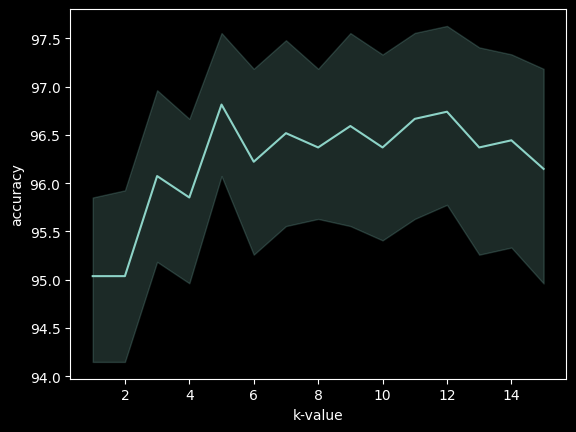

In [47]:
sns.lineplot(data=ka, x="k-value", y="accuracy")

In [48]:
np.argmax(accuracy_list)

np.int64(103)

In [50]:
accuracy_raw[103]

np.float64(100.0)

In [52]:
k_list[103]

14

**Using Sklearn Implemention**

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X,y = iris.data, iris.target



# Train + temp split (80/20)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Split temp into validation and test (50/50 → 10% each)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

In [54]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
val_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, val_pred))

Validation Accuracy: 1.0


In [57]:
#cross-validation

from sklearn.model_selection import cross_val_score, KFold


model1 = KNeighborsClassifier(n_neighbors=5)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf)

print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())

Cross-validation scores: [1.         1.         0.96666667 0.93333333 0.96666667]
Mean CV accuracy: 0.9733333333333334


**GridSearchCV**

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

# Define hyperparameter grid
param_grid = {
    "knn__n_neighbors": [3, 5, 7, 9, 11,10],
    "knn__weights": ["uniform", "distance"],
    "knn__metric": ["euclidean", "manhattan", "minkowski"]
}

# Grid search with validation (5-fold CV)
gs = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1   # use all CPUs
)

#  Fit
gs.fit(X, y)

# Results
print("Best parameters:", gs.best_params_)
print("Best cross-val accuracy:", gs.best_score_)


Best parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 7, 'knn__weights': 'distance'}
Best cross-val accuracy: 0.9666666666666666


**RandomizedSearchCV**

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

# Define hyperparameter grid
param_dist = {
    "knn__n_neighbors": randint(1, 31),
    "knn__weights": ["uniform", "distance"],
    "knn__metric": ["euclidean", "manhattan", "minkowski"]
}

# Grid search with validation (5-fold CV)
rs = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=20,                 # number of random combinations
    cv=5,                      # 5-fold cross-validation
    scoring="accuracy",
    random_state=42,
    n_jobs=-1
)

#  Fit
rs.fit(X, y)

# Results
print("Best parameters:", rs.best_params_)
print("Best cross-val accuracy:", rs.best_score_)


Best parameters: {'knn__metric': 'minkowski', 'knn__n_neighbors': 10, 'knn__weights': 'distance'}
Best cross-val accuracy: 0.9666666666666666


1) Heatmap (k vs metric vs accuracy) ...


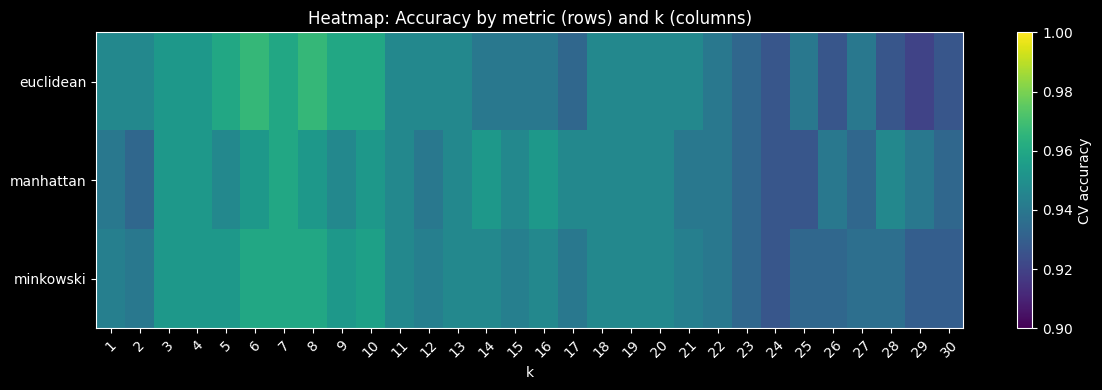


2) Build two best models from example results (Grid: euclidean k=7, Random: minkowski k=10) and plot decision boundaries...


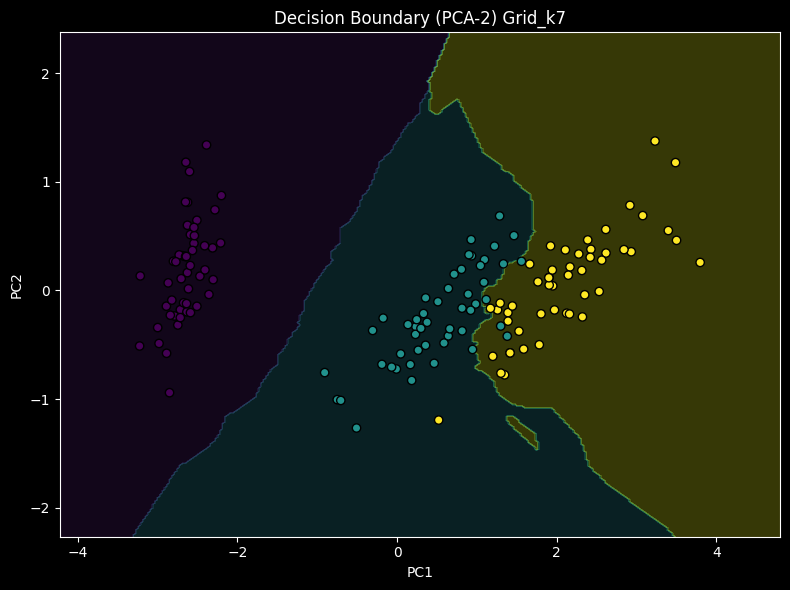

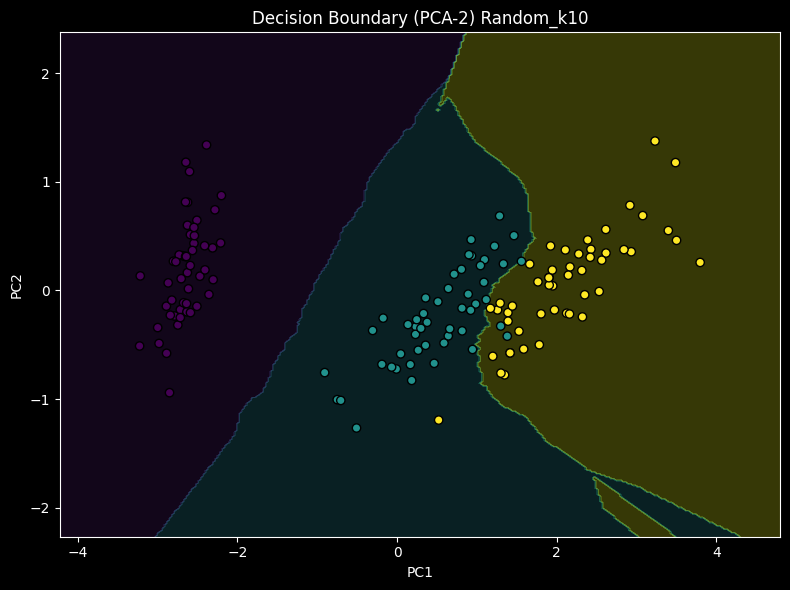

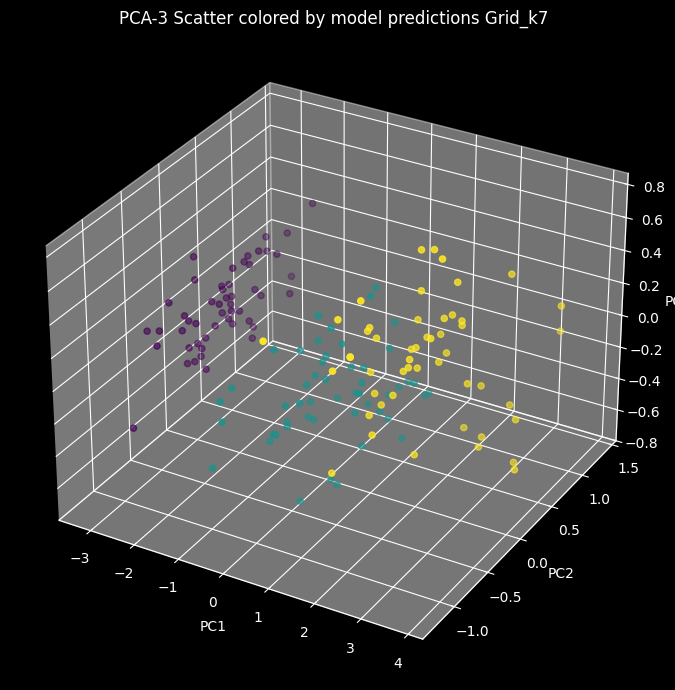

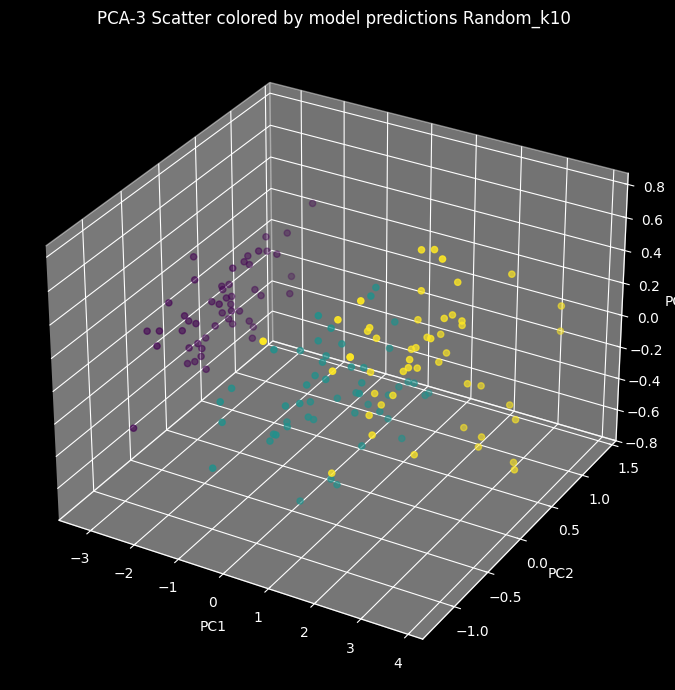


3) Feature importance (permutation style) for the grid model and random model - using simple permutation importance...


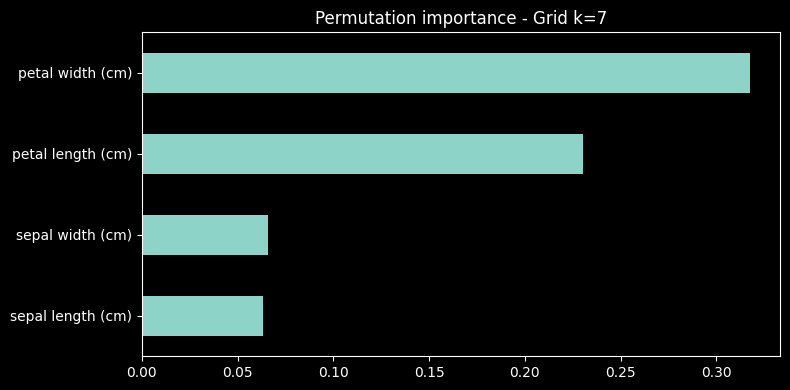

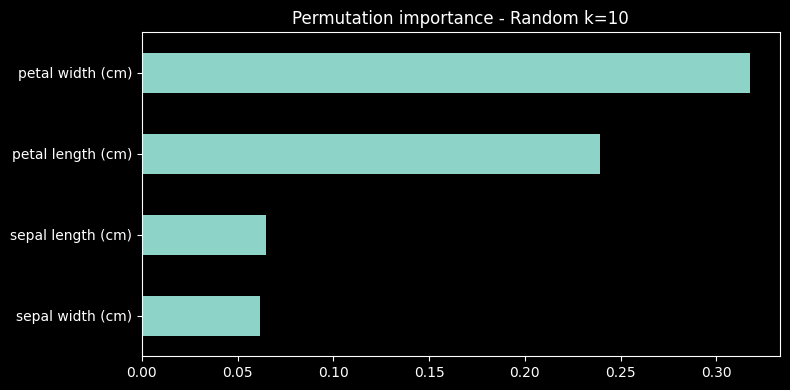


4) 'SHAP-style' nearest neighbor explanation for 3 example samples ...

Nearest neighbors explanation for sample 0 (true label = 0):
idx	label	distance	original_features
0	0	0.0000	[5.1 3.5 1.4 0.2]
17	0	0.1316	[5.1 3.5 1.4 0.3]
27	0	0.1338	[5.2 3.5 1.5 0.2]
40	0	0.1877	[5.  3.5 1.3 0.3]
39	0	0.2371	[5.1 3.4 1.5 0.2]

Weighted class votes (by 1/distance):
class 0: 100000024.6133
Predicted class by weighted neighbors: 0

Nearest neighbors explanation for sample 50 (true label = 1):
idx	label	distance	original_features
50	1	0.0000	[7.  3.2 4.7 1.4]
52	1	0.3129	[6.9 3.1 4.9 1.5]
86	1	0.4499	[6.7 3.1 4.7 1.5]
65	1	0.4628	[6.7 3.1 4.4 1.4]
75	1	0.6899	[6.6 3.  4.4 1.4]

Weighted class votes (by 1/distance):
class 1: 100000009.0283
Predicted class by weighted neighbors: 1

Nearest neighbors explanation for sample 100 (true label = 2):
idx	label	distance	original_features
100	2	0.0000	[6.3 3.3 6.  2.5]
136	2	0.3493	[6.3 3.4 5.6 2.4]
148	2	0.5033	[6.2 3.4 5.4 2.3]
144	2	0.5138	[6.7 3.3 5.7 2.

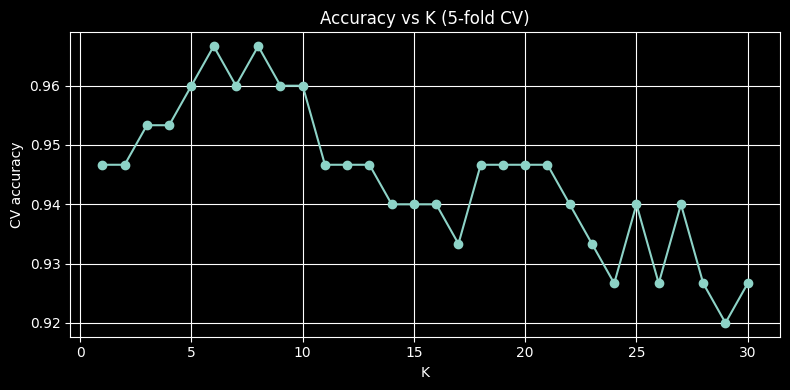


6) Nested cross-validation example (outer 5-fold, inner 3-fold grid on k) ...
Fold 1: best_k=4, val_inner=0.9583, outer_test_acc=1.0000
Fold 2: best_k=5, val_inner=0.9500, outer_test_acc=0.9667
Fold 3: best_k=3, val_inner=0.9583, outer_test_acc=0.9667
Fold 4: best_k=5, val_inner=0.9917, outer_test_acc=0.9000
Fold 5: best_k=8, val_inner=0.9583, outer_test_acc=0.9000


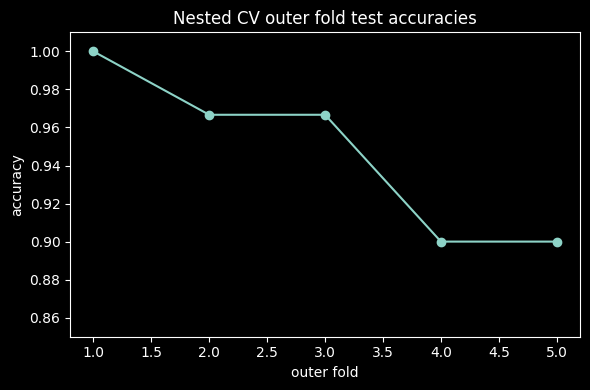


7) Classifier benchmark ...


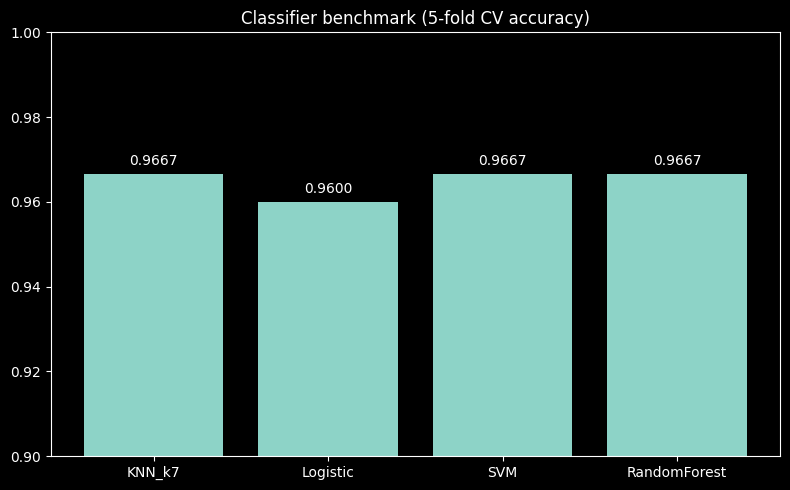

{'KNN_k7': {'score': np.float64(0.9666666666666666), 'time': 2.4515023231506348}, 'Logistic': {'score': np.float64(0.9600000000000002), 'time': 0.08531761169433594}, 'SVM': {'score': np.float64(0.9666666666666666), 'time': 0.04896259307861328}, 'RandomForest': {'score': np.float64(0.9666666666666668), 'time': 2.2119102478027344}}

8) AutoML / Search comparisons (Grid / Randomized / Halving / Optuna fallback) ...

Running GridSearchCV...
GridSearch best params: {'knn__metric': 'euclidean', 'knn__n_neighbors': 7, 'knn__weights': 'distance'} best_score: 0.9666666666666666 time: 1.07

Running RandomizedSearchCV...
RandomizedSearch best params: {'knn__metric': 'minkowski', 'knn__n_neighbors': 10, 'knn__weights': 'distance'} best_score: 0.9666666666666666 time: 0.73

Running HalvingRandomSearchCV (successive halving)...
HalvingRandomSearch best params: {'knn__metric': 'minkowski', 'knn__n_neighbors': 11, 'knn__weights': 'distance'} best_score: 0.9583333333333334 time: 0.47

Optuna not availa

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from scipy.stats import randint
import time
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# -------------------------
# Load and prepare data
# -------------------------
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# standard scaler pipeline helper
def make_knn_pipeline(n_neighbors=5, metric="minkowski", p=2, weights="distance"):
    return Pipeline([
        ("scaler", StandardScaler()),
        ("knn", KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric, p=p, weights=weights))
    ])

# -------------------------
# Heatmap: accuracy vs k and metric
# -------------------------
def heatmap_k_metric(X, y, k_vals=range(1,31), metrics=["euclidean","manhattan","minkowski"]):
    results = []
    for metric in metrics:
        for k in k_vals:
            # when metric == 'minkowski' we try p=1 and p=2 and average
            if metric == "minkowski":
                pipes = [
                    Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=1))]),
                    Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k, metric="minkowski", p=2))])
                ]
                scores = [cross_val_score(p, X, y, cv=5).mean() for p in pipes]
                score = np.mean(scores)
            else:
                pipe = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k, metric=metric))])
                score = cross_val_score(pipe, X, y, cv=5).mean()
            results.append((metric, k, score))
    res_df = pd.DataFrame(results, columns=["metric","k","accuracy"])
    pivot = res_df.pivot(index="metric", columns="k", values="accuracy")
    plt.figure(figsize=(12,4))
    plt.title("Heatmap: Accuracy by metric (rows) and k (columns)")
    im = plt.imshow(pivot, aspect='auto', cmap='viridis', vmin=0.9, vmax=1.0)
    plt.colorbar(im, label="CV accuracy")
    plt.yticks(range(len(pivot.index)), pivot.index)
    plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=45)
    plt.xlabel("k")
    plt.tight_layout()
    plt.savefig("heatmap_k_metric.png", dpi=150)
    plt.show()
    return res_df

# -------------------------
# Decision boundary - PCA 2D and PCA 3D scatter
# -------------------------
def decision_boundary_pca(model_pipeline, X, y, pca=2, title_suffix=""):
    pca_obj = PCA(n_components=pca)
    Xp = pca_obj.fit_transform(X)
    # 2D case: plot mesh and contour
    if pca == 2:
        model_pipeline.fit(X, y)  # pipeline expects original X
        # create grid in PCA space, then invert-transform to original space for prediction
        x_min, x_max = Xp[:,0].min() - 1, Xp[:,0].max() + 1
        y_min, y_max = Xp[:,1].min() - 1, Xp[:,1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
        grid_pca = np.c_[xx.ravel(), yy.ravel()]
        # invert transform -> approximate original features
        inv = pca_obj.inverse_transform(grid_pca)
        preds = model_pipeline.predict(inv)
        Z = preds.reshape(xx.shape)
        plt.figure(figsize=(8,6))
        plt.contourf(xx, yy, Z, alpha=0.25)
        plt.scatter(Xp[:,0], Xp[:,1], c=y, cmap='viridis', edgecolor='k')
        plt.title(f"Decision Boundary (PCA-2) {title_suffix}")
        plt.xlabel("PC1"); plt.ylabel("PC2")
        plt.tight_layout()
        plt.savefig(f"decision_boundary_pca2_{title_suffix.replace(' ','_')}.png", dpi=150)
        plt.show()
    # 3D scatter of PCA components with model predictions as background markers
    if pca == 3:
        model_pipeline.fit(X, y)
        fig = plt.figure(figsize=(9,7))
        ax = fig.add_subplot(111, projection='3d')
        preds = model_pipeline.predict(X)
        scatter = ax.scatter(Xp[:,0], Xp[:,1], Xp[:,2], c=preds, cmap='viridis', depthshade=True)
        ax.set_title(f"PCA-3 Scatter colored by model predictions {title_suffix}")
        ax.set_xlabel("PC1"); ax.set_ylabel("PC2"); ax.set_zlabel("PC3")
        plt.tight_layout()
        plt.savefig(f"pca3_scatter_{title_suffix.replace(' ','_')}.png", dpi=150)
        plt.show()

# -------------------------
# "SHAP-style" nearest-neighbor explanation
# -------------------------
def knn_nearest_neighbor_explanation(X, y, sample_index=0, k=5, model=None):
    """
    For a sample, show its k nearest neighbors, distances, neighbor labels, and weighted vote.
    This is a transparent explanation for KNN decisions (similar spirit to SHAP's local explanation).
    """
    scaler = StandardScaler().fit(X)
    Xs = scaler.transform(X)
    q = Xs[sample_index].reshape(1, -1)
    # if model is supplied (fitted KNN pipeline), use its internal KNeighborsClassifier to retrieve
    if model is None:
        knn = KNeighborsClassifier(n_neighbors=k, weights="distance")
        knn.fit(Xs, y)
    else:
        # try to extract the KNeighborsClassifier from pipeline
        try:
            knn = model.named_steps['knn']
            # ensure fitted on scaled data: if pipeline, fit scaler then classifier
        except Exception:
            knn = KNeighborsClassifier(n_neighbors=k, weights="distance")
            knn.fit(Xs, y)
    # use sklearn's kneighbors
    distances, indices = knn.kneighbors(q, n_neighbors=k)
    distances = distances.ravel()
    indices = indices.ravel()
    print(f"\nNearest neighbors explanation for sample {sample_index} (true label = {y[sample_index]}):")
    print("idx\tlabel\tdistance\toriginal_features")
    for i, d in zip(indices, distances):
        print(f"{i}\t{y[i]}\t{d:.4f}\t{np.round(X[i],3)}")
    # weighted vote
    # weights = 1 / (dist + eps)
    eps = 1e-8
    w = 1.0 / (distances + eps)
    # aggregate per class
    class_votes = {}
    for idx, weight in zip(indices, w):
        label = int(y[idx])
        class_votes[label] = class_votes.get(label, 0) + weight
    print("\nWeighted class votes (by 1/distance):")
    for label, vote in class_votes.items():
        print(f"class {label}: {vote:.4f}")
    pred = max(class_votes.items(), key=lambda x: x[1])[0]
    print(f"Predicted class by weighted neighbors: {pred}")
    return indices, distances, class_votes

# -------------------------
# Classifier benchmark
# -------------------------
def benchmark_classifiers(X, y):
    classifiers = {
        "KNN_k7": Pipeline([("scaler", StandardScaler()), ("clf", KNeighborsClassifier(n_neighbors=7, weights="distance"))]),
        "Logistic": Pipeline([("scaler", StandardScaler()), ("clf", LogisticRegression(max_iter=1000))]),
        "SVM": Pipeline([("scaler", StandardScaler()), ("clf", SVC(probability=True))]),
        "RandomForest": Pipeline([("scaler", StandardScaler()), ("clf", RandomForestClassifier(n_estimators=200))])
    }
    results = {}
    for name, pipe in classifiers.items():
        t0 = time.time()
        score = cross_val_score(pipe, X, y, cv=5, n_jobs=-1).mean()
        t1 = time.time()
        results[name] = {"score": score, "time": t1 - t0}
    # bar plot
    names = list(results.keys())
    scores = [results[n]['score'] for n in names]
    plt.figure(figsize=(8,5))
    plt.bar(names, scores)
    plt.ylim(0.9,1.0)
    plt.title("Classifier benchmark (5-fold CV accuracy)")
    for i,v in enumerate(scores):
        plt.text(i, v+0.002, f"{v:.4f}", ha='center')
    plt.tight_layout()
    plt.savefig("classifier_benchmark.png", dpi=150)
    plt.show()
    return results

# -------------------------
# AutoML comparisons
# -------------------------
def automl_comparisons(X, y):
    # parameter grid for KNN
    param_grid = {
        "knn__n_neighbors": [3,5,7,9,11],
        "knn__weights": ["uniform", "distance"],
        "knn__metric": ["euclidean", "manhattan", "minkowski"]
    }
    pipe = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier())])
    # GridSearch
    print("\nRunning GridSearchCV...")
    gs = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
    t0 = time.time()
    gs.fit(X, y)
    t1 = time.time()
    print("GridSearch best params:", gs.best_params_, "best_score:", gs.best_score_, "time:", round(t1-t0,2))
    # RandomizedSearch
    print("\nRunning RandomizedSearchCV...")
    param_dist = {
        "knn__n_neighbors": randint(1, 31),
        "knn__weights": ["uniform", "distance"],
        "knn__metric": ["euclidean","manhattan","minkowski"]
    }
    rs = RandomizedSearchCV(pipe, param_distributions=param_dist, n_iter=20, cv=5, random_state=42, n_jobs=-1)
    t0 = time.time()
    rs.fit(X, y)
    t1 = time.time()
    print("RandomizedSearch best params:", rs.best_params_, "best_score:", rs.best_score_, "time:", round(t1-t0,2))
    # HalvingRandomSearchCV (successive halving)
    print("\nRunning HalvingRandomSearchCV (successive halving)...")
    hr = HalvingRandomSearchCV(pipe, param_distributions=param_dist, n_jobs=-1, cv=5, factor=2, random_state=42)
    t0 = time.time()
    hr.fit(X, y)
    t1 = time.time()
    print("HalvingRandomSearch best params:", hr.best_params_, "best_score:", hr.best_score_, "time:", round(t1-t0,2))

    # Optional: Bayesian (Optuna) - graceful fallback if not installed
    try:
        import optuna
        from sklearn.model_selection import cross_val_score
        def objective(trial):
            k = trial.suggest_int("k", 1, 30)
            metric = trial.suggest_categorical("metric", ["euclidean", "manhattan"])
            weights = trial.suggest_categorical("weights", ["uniform", "distance"])
            pipe = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k, metric=metric, weights=weights))])
            score = cross_val_score(pipe, X, y, cv=5, n_jobs=-1).mean()
            return score
        print("\nRunning Optuna Bayesian optimization (if Optuna installed)...")
        study = optuna.create_study(direction="maximize")
        study.optimize(objective, n_trials=30, n_jobs=1, show_progress_bar=False)
        print("Optuna best params:", study.best_params, "best_score:", study.best_value)
    except Exception as e:
        print("\nOptuna not available or failed; skipping Bayesian opt. (Install optuna to enable).")
        # fallback: use hyperopt pattern could be added similarly

    return {"GridSearch": gs, "RandomizedSearch": rs, "HalvingRandomSearch": hr}

# -------------------------
# Run everything
# -------------------------
if __name__ == "__main__":
    print("1) Heatmap (k vs metric vs accuracy) ...")
    heatmap_df = heatmap_k_metric(X, y, k_vals=range(1,31), metrics=["euclidean","manhattan","minkowski"])
    heatmap_df.to_csv("heatmap_k_metric_results.csv", index=False)

    print("\n2) Build two best models from example results (Grid: euclidean k=7, Random: minkowski k=10) and plot decision boundaries...")
    model_grid = make_knn_pipeline(n_neighbors=7, metric="euclidean", weights="distance")
    model_random = make_knn_pipeline(n_neighbors=10, metric="minkowski", weights="distance")
    # decision boundary PCA2
    decision_boundary_pca(model_grid, X, y, pca=2, title_suffix="Grid_k7")
    decision_boundary_pca(model_random, X, y, pca=2, title_suffix="Random_k10")
    # PCA3 scatter
    decision_boundary_pca(model_grid, X, y, pca=3, title_suffix="Grid_k7")
    decision_boundary_pca(model_random, X, y, pca=3, title_suffix="Random_k10")

    print("\n3) Feature importance (permutation style) for the grid model and random model - using simple permutation importance...")
    # Permutation importance (simple implementation using cross-val drop)
    from sklearn.inspection import permutation_importance
    model_grid.fit(X, y)
    model_random.fit(X, y)
    r_grid = permutation_importance(model_grid, X, y, n_repeats=20, random_state=0)
    r_rand = permutation_importance(model_random, X, y, n_repeats=20, random_state=0)
    fi_grid = pd.Series(r_grid.importances_mean, index=feature_names).sort_values(ascending=True)
    fi_rand = pd.Series(r_rand.importances_mean, index=feature_names).sort_values(ascending=True)
    # Plot
    plt.figure(figsize=(8,4))
    fi_grid.plot(kind='barh'); plt.title("Permutation importance - Grid k=7"); plt.tight_layout(); plt.savefig("perm_importance_grid.png", dpi=150); plt.show()
    plt.figure(figsize=(8,4))
    fi_rand.plot(kind='barh'); plt.title("Permutation importance - Random k=10"); plt.tight_layout(); plt.savefig("perm_importance_random.png", dpi=150); plt.show()

    print("\n4) 'SHAP-style' nearest neighbor explanation for 3 example samples ...")
    for idx in [0, 50, 100]:
        knn_nearest_neighbor_explanation(X, y, sample_index=idx, k=5, model=None)

    print("\n5) Accuracy vs K plot (1..30) ...")
    k_vals = range(1,31)
    accuracies = []
    for k in k_vals:
        pipe = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))])
        acc = cross_val_score(pipe, X, y, cv=5).mean()
        accuracies.append(acc)
    plt.figure(figsize=(8,4))
    plt.plot(k_vals, accuracies, marker='o')
    plt.title("Accuracy vs K (5-fold CV)")
    plt.xlabel("K"); plt.ylabel("CV accuracy")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("accuracy_vs_k.png", dpi=150)
    plt.show()

    print("\n6) Nested cross-validation example (outer 5-fold, inner 3-fold grid on k) ...")
    outer = KFold(n_splits=5, shuffle=True, random_state=42)
    inner = KFold(n_splits=3, shuffle=True, random_state=42)
    nested_scores = []
    fold_idx = 0
    for train_idx, test_idx in outer.split(X):
        fold_idx += 1
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        # inner tune best k in 1..15
        best_k = 1
        best_sc = 0
        for k in range(1,16):
            pipe = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))])
            sc = cross_val_score(pipe, X_train, y_train, cv=inner).mean()
            if sc > best_sc:
                best_sc = sc; best_k = k
        final_model = Pipeline([("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=best_k))])
        final_model.fit(X_train, y_train)
        test_acc = final_model.score(X_test, y_test)
        nested_scores.append(test_acc)
        print(f"Fold {fold_idx}: best_k={best_k}, val_inner={best_sc:.4f}, outer_test_acc={test_acc:.4f}")
    plt.figure(figsize=(6,4))
    plt.plot(range(1,len(nested_scores)+1), nested_scores, marker='o')
    plt.title("Nested CV outer fold test accuracies")
    plt.xlabel("outer fold"); plt.ylabel("accuracy"); plt.ylim(0.85,1.01)
    plt.tight_layout(); plt.savefig("nested_cv_outer.png", dpi=150); plt.show()

    print("\n7) Classifier benchmark ...")
    benchmark_results = benchmark_classifiers(X, y)
    print(benchmark_results)

    print("\n8) AutoML / Search comparisons (Grid / Randomized / Halving / Optuna fallback) ...")
    automl_results = automl_comparisons(X, y)
